# Analyzing and Predicting Coffee Futures in Relation to BRL

In this part of our analysis we will try to see a correlation between the time serious off coffee future prices and the time she gets off Brazilian currency. Afterwards we will try to predict ( of course in case of any correlation)   using multiple variables on the coffee Market as well as the Brazilian currency. 

## imports

In [180]:
# imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import datetime
from IPython.display import display

## getting datasets

### getting coffee futures dataset

In [181]:
file1 = 'US Coffee C Futures Historical Data.csv'
table1 = pd.read_csv(file1)
file2 = 'US Coffee C Futures Historical Data2.csv'
table2 = pd.read_csv(file2)
file3 = 'US Coffee C Futures Historical Data3.csv'
table3 = pd.read_csv(file3)
data_frames = [table1, table2, table3]
df_init = pd.concat(data_frames)
df_init = df_init.drop_duplicates()
df_init['Date'] = df_init['Date'].astype(str)
df_init['Date'] = pd.to_datetime(df_init['Date'])
df_init = df_init.set_index(['Date'])
df_init.sort_index(inplace=True)
df_coffee=df_init
display(df_coffee.head())
display(df_coffee.tail())

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1980-08-26,130.75,130.62,132.00,124.50,0.29K,2.28%
1980-08-27,131.08,131.50,132.00,127.50,0.33K,0.25%
1980-08-28,130.22,128.12,130.50,127.25,0.16K,-0.66%
1980-08-29,128.00,126.25,128.90,125.50,0.08K,-1.70%
1980-09-02,125.57,124.62,125.75,123.10,0.14K,-1.90%


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-09-20,98.40,98.50,99.75,98.05,22.02K,0.05%
2019-09-23,99.00,98.50,100.90,98.15,17.16K,0.61%
2019-09-24,99.15,98.85,100.35,98.45,13.62K,0.15%
2019-09-25,100.95,98.90,101.55,97.25,24.94K,1.82%
2019-09-26,101.78,101.18,102.90,100.63,-,0.82%


In [182]:
file4="USD_BRL Historical Data (1).csv"
file5="USD_BRL Historical Data (2).csv"
table4=pd.read_csv(file4)
table5=pd.read_csv(file5)
data_frames = [table4, table5]
df_init = pd.concat(data_frames)
df_init = df_init.drop_duplicates()
df_init['Date'] = df_init['Date'].astype(str)
df_init['Date'] = pd.to_datetime(df_init['Date'])
df_init = df_init.set_index(['Date'])
df_init.sort_index(inplace=True)
df_brl=df_init
display(df_brl.head())
display(df_brl.tail())

,Price,Open,High,Low,Change %
Date,,,,,
1992-12-18,0.0052,0.0052,0.0052,0.0052,-1.89%
1992-12-21,0.0052,0.0052,0.0052,0.0052,0.00%
1992-12-22,0.0052,0.0052,0.0052,0.0052,0.00%
1992-12-23,0.0052,0.0052,0.0052,0.0052,0.00%
1992-12-24,0.0052,0.0052,0.0052,0.0052,0.00%


,Price,Open,High,Low,Change %
Date,,,,,
2019-09-30,4.1556,4.1618,4.1720,4.1411,-0.11%
2019-10-01,4.1590,4.1575,4.1863,4.1524,0.08%
2019-10-02,4.1293,4.1580,4.1821,4.1270,-0.71%
2019-10-03,4.0841,4.1296,4.1306,4.0743,-1.09%
2019-10-04,4.0556,4.0845,4.0856,4.0496,-0.70%


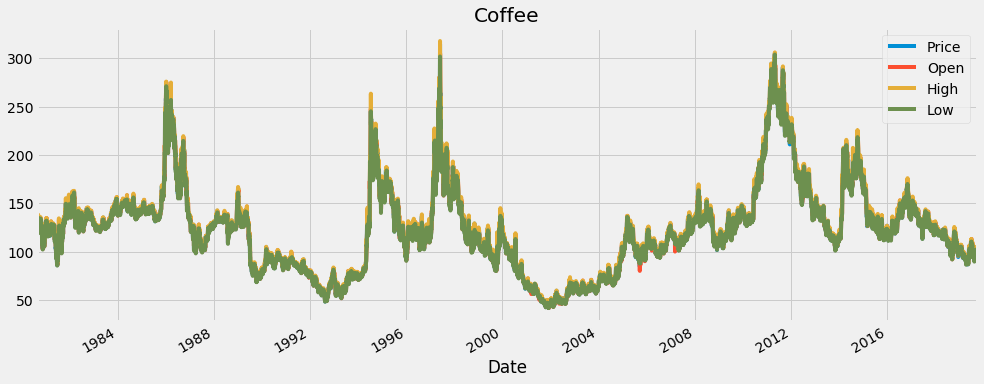

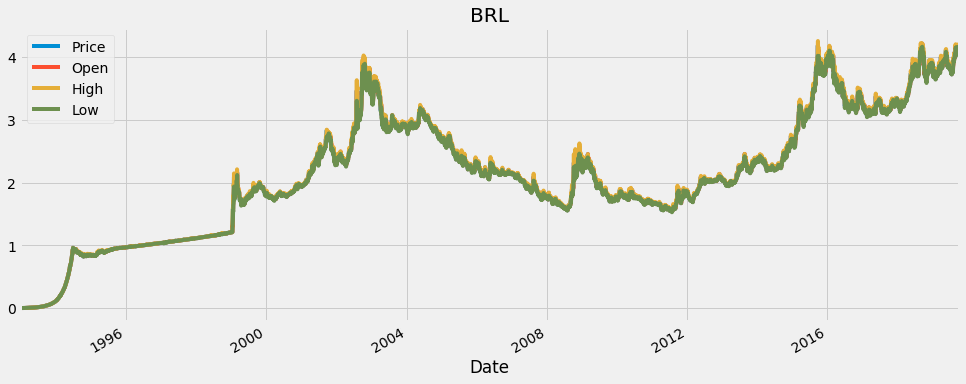

In [183]:
df_coffee.plot(figsize=(15, 6),title="Coffee")
df_brl.plot(figsize=(15, 6),title="BRL")
plt.show()

In [184]:
display(df_coffee.dtypes)
print("********************")
display(df_brl.dtypes)

Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

********************


Price       float64
Open        float64
High        float64
Low         float64
Change %     object
dtype: object

In [185]:
df_coffee['Change %'] = df_coffee.loc[:,['Change %']].apply(lambda x: x.str.strip('%'))
df_coffee['Change %'] = df_coffee['Change %'].apply(pd.to_numeric, errors='coerce')
df_coffee['Change %'] = df_coffee.loc[:,['Change %']].apply(lambda x: x/100)
df_coffee['Vol.'] = df_coffee.loc[:,['Vol.']].apply(lambda x: x.str.strip('K'))
df_coffee['Vol.'] = df_coffee['Vol.'].apply(pd.to_numeric, errors='coerce')
df_coffee['Vol.'] = df_coffee.loc[:,['Vol.']].apply(lambda x: x*1000)
display(df_coffee.dtypes)
display(df_coffee.head())

Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1980-08-26,130.75,130.62,132.00,124.50,290.0,0.0228
1980-08-27,131.08,131.50,132.00,127.50,330.0,0.0025
1980-08-28,130.22,128.12,130.50,127.25,160.0,-0.0066
1980-08-29,128.00,126.25,128.90,125.50,80.0,-0.0170
1980-09-02,125.57,124.62,125.75,123.10,140.0,-0.0190


In [186]:
df_brl['Change %'] = df_brl.loc[:,['Change %']].apply(lambda x: x.str.strip('%'))
df_brl['Change %'] = df_brl['Change %'].apply(pd.to_numeric, errors='coerce')
df_brl['Change %'] = df_brl.loc[:,['Change %']].apply(lambda x: x/100)
# df_brl['Vol.'] = df_brl.loc[:,['Vol.']].apply(lambda x: x.str.strip('K'))
# df_brl['Vol.'] = df_brl['Vol.'].apply(pd.to_numeric, errors='coerce')
# df_brl['Vol.'] = df_brl.loc[:,['Vol.']].apply(lambda x: x*1000)
display(df_coffee.dtypes)
display(df_coffee.head())

Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
1980-08-26,130.75,130.62,132.00,124.50,290.0,0.0228
1980-08-27,131.08,131.50,132.00,127.50,330.0,0.0025
1980-08-28,130.22,128.12,130.50,127.25,160.0,-0.0066
1980-08-29,128.00,126.25,128.90,125.50,80.0,-0.0170
1980-09-02,125.57,124.62,125.75,123.10,140.0,-0.0190


In [187]:
df_coffee = df_coffee.loc["2003-01-01":"2008-12-31",:]
df_brl = df_brl.loc["2003-01-01":"2008-12-31",:]

In [188]:
display(df_coffee.head())
display(df_brl.head())

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2003-01-02,61.65,60.50,62.00,60.25,5420.0,0.0241
2003-01-03,61.25,60.65,61.60,60.50,3630.0,-0.0065
2003-01-06,63.25,60.75,63.90,60.75,8980.0,0.0327
2003-01-07,63.50,62.50,64.25,62.50,5970.0,0.0040
2003-01-08,62.85,63.00,63.70,62.50,5710.0,-0.0102


,Price,Open,High,Low,Change %
Date,,,,,
2003-01-01,3.5400,3.5400,3.5400,3.5400,0.0000
2003-01-02,3.5260,3.5380,3.5580,3.5040,-0.0040
2003-01-03,3.4390,3.5330,3.5330,3.4050,-0.0247
2003-01-06,3.3380,3.4330,3.4380,3.3230,-0.0294
2003-01-07,3.2825,3.4325,3.4325,3.2775,-0.0166


In [189]:
df_coffee = df_coffee.asfreq('D')
df_coffee = df_coffee.resample('D').interpolate()[::7]
df_brl = df_brl.asfreq('D')
df_brl = df_brl.resample('D').interpolate()[::7]

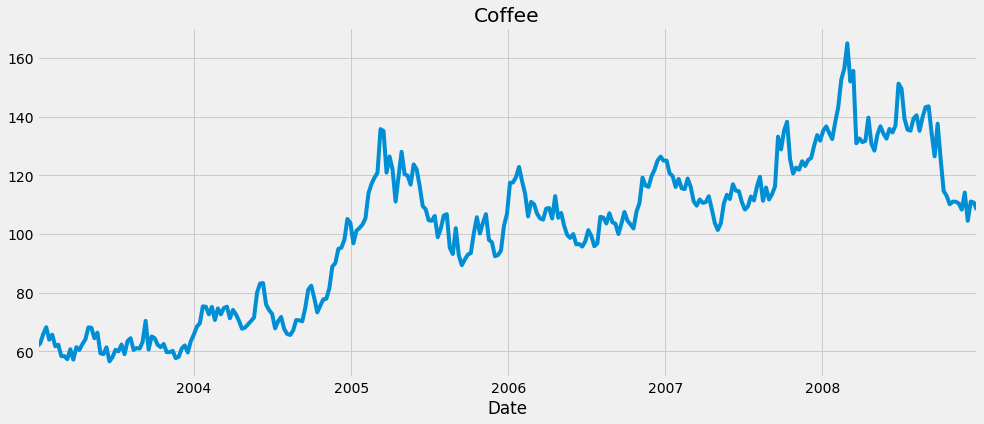

In [190]:
df_coffee['Price'].plot(figsize=(15, 6),title="Coffee")
plt.show()

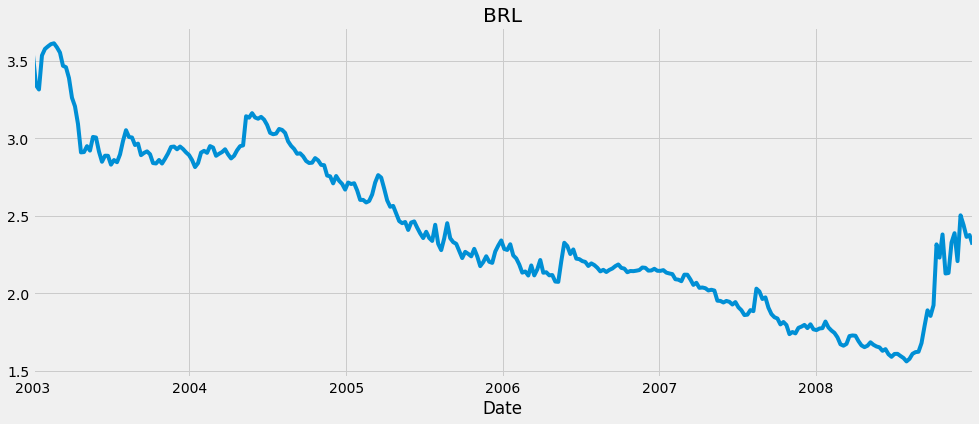

In [191]:
df_brl['Price'].plot(figsize=(15, 6),title="BRL")
plt.show()